In [1]:
import csv
import pandas as pd
import pandas_datareader.data as web
import datetime
import time
import mysql.connector
from mysql.connector import connect
import plotly.graph_objects as go
from matplotlib import pyplot as plt

In [2]:
connection = mysql.connector.connect(
    host='localhost',
    user='****',
    password='********')

create_db = "CREATE DATABASE Index_database"
select_db= "USE Index_database;"
with connection.cursor() as cursor:
    cursor.execute(create_db)

In [3]:
with connection.cursor() as cursor:
    cursor.execute(select_db)
    cursor.execute('''CREATE TABLE companyinfo(
       Tickersymbol char(15) NOT NULL PRIMARY KEY,
       Companyname char(50) NULL''')

In [4]:
insert_values = "INSERT INTO companyinfo (Tickersymbol,companyname) VALUES (%s, %s)"

values = [('ABB.ST', 'ABB ltd'),
         ('ADDT-B.ST', 'AddTech AB'),
         ('AFRY.ST', 'Afry AB'),
         ('ALFA.ST', 'Alfa Laval AB'),
         ('ASSA-B.ST', 'ASSA ABLOY AB'),
         ('ATCO-A.ST', 'Atlas Copco AB'),
         ('Beij-B.ST', 'Beijer Ref AB'),
         ('BRAV.ST', 'Bravida Holding AB'),
         ('EPI-B.ST', 'Epiroc AB'),
         ('HEXA-B.ST', 'Hexagon AB'),
         ('INDT.ST', 'Indutrade AB'),
         ('JM.ST', 'JM AB'),
         ('LOOMIS.ST', 'Loomis AB'),
         ('NCC-B.ST', 'NCC AB'),
         ('NIBE-B.ST', 'NIBE Industrier AB'),
         ('PEAB-B.ST', 'Peab AB'),
         ('SAAB-B.ST', 'Saab AB'),
         ('SAND.ST', 'Sandvik AB'),
         ('SDIP-B.ST', 'Sdiptech AB'),
         ('SECU-B.ST', 'Securitas AB'),
         ('SKA-B.ST', 'Skanska AB'),
         ('SKF-B.ST', 'AB SKF'),
         ('SWEC-B.ST', 'Sweco AB'),
         ('8TRA.ST', 'Traton SE'),
         ('VOLV-B.ST', 'AB Volvo'),
         ('^OMX','OMX Stockholm 30 Index ')]
with connection.cursor() as cursor:
    cursor.executemany(insert_values,values)
connection.commit()

In [6]:
query = "SELECT Tickersymbol FROM companyinfo"
companyinfo = pd.read_sql(query, connection)
updated = []
Updated = []
i=0
start = datetime.datetime(2011,9,8)
end = datetime.datetime(2021,9,8)
start_time = time.time()

while i<len(companyinfo['Tickersymbol']):
    data = web.DataReader(companyinfo['Tickersymbol'][i], 'yahoo',start,end)
    data.insert(0,'Tickersymbol',companyinfo['Tickersymbol'][i])
    data = data.drop(['Adj Close'], axis=1)
    updated = pd.DataFrame(data)
    Updated.append(updated)
    stockdata_table=pd.concat(Updated, axis=0)
    i = i+1
print("---%s seconds ---" % (time.time() - start_time))

---18.49787402153015 seconds ---


In [9]:
stockdata_table.reset_index(level=0, inplace=True)
stockdata_table = stockdata_table.rename(columns={'Date': 'TradeDate', 'Symbol':'Tickersymbol','Open':'ST_Open','High':'ST_High','Low':'ST_Low','Close':'ST_Close','Volume':'Volume'})
stockdata_table = stockdata_table.merge(companyinfo, on ='Tickersymbol',how='left')
stockdata_table = stockdata_table[['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']]

In [10]:
with connection.cursor() as cursor:
    cursor.execute(select_db)
    cursor.execute('''CREATE TABLE stockdata_table(
       Tickersymbol char(15) NULL,
       TradeDate DATETIME NULL,
       ST_Open DECIMAL (21,13) NULL,
       ST_High DECIMAL (21,13) NULL,
       ST_Low DECIMAL (21,13) NULL,
       ST_Close DECIMAL (21,13) NULL,
       Volume DECIMAL(34,2) NULL
       )''')
connection.commit()

In [14]:
connection = mysql.connector.connect(
    host='localhost',
    user='****',
    password='********'
)
select_db= "USE Index_database;"
with connection.cursor() as cursor:
    cursor.execute(select_db)
with connection.cursor() as cursor:
    insert_query = 'INSERT INTO stockdata_table(Tickersymbol,TradeDate,ST_open,ST_High,ST_Low,ST_Close,Volume) VALUES (%s,%s,%s,%s,%s,%s,%s)'
    for index, row in stockdata_table.iterrows():
        cursor.execute(insert_query, [row['Tickersymbol'],row['TradeDate'],row['ST_Open'],row['ST_High'],row['ST_Low'],row['ST_Close'],row['Volume']])
connection.commit()

In [15]:
connection = mysql.connector.connect(
    host='localhost',
    user='****',
    password='********'
)
select_db= "USE Index_database;"
with connection.cursor() as cursor:
    cursor.execute(select_db)
ABB_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'ABB.ST'", connection)
ABB_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
ABB_stock_df['TradeDate'] = pd.to_datetime(ABB_stock_df['TradeDate'])
ABB_stock_df = ABB_stock_df.sort_values('TradeDate', ascending=True)
ABB_stock_df = ABB_stock_df.dropna()
ABB_stock_df['ST_Close'] = ABB_stock_df['ST_Close'].astype(float)
ABB_stock_df['percentage'] = ((ABB_stock_df['ST_Close']/ABB_stock_df['ST_Close'][0])*100)-100

ADDT_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'ADDT-B.ST'", connection)
ADDT_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
ADDT_stock_df['TradeDate'] = pd.to_datetime(ADDT_stock_df['TradeDate'])
ADDT_stock_df = ADDT_stock_df.sort_values('TradeDate', ascending=True)
ADDT_stock_df = ADDT_stock_df.dropna()
ADDT_stock_df['ST_Close'] = ADDT_stock_df['ST_Close'].astype(float)
ADDT_stock_df['percentage'] = ((ADDT_stock_df['ST_Close']/ADDT_stock_df['ST_Close'][0])*100)-100

AFRY_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'AFRY.ST'", connection)
AFRY_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
AFRY_stock_df['TradeDate'] = pd.to_datetime(AFRY_stock_df['TradeDate'])
AFRY_stock_df = AFRY_stock_df.sort_values('TradeDate', ascending=True)
AFRY_stock_df = AFRY_stock_df.dropna()
AFRY_stock_df['ST_Close'] = AFRY_stock_df['ST_Close'].astype(float)
AFRY_stock_df['percentage'] = ((AFRY_stock_df['ST_Close']/AFRY_stock_df['ST_Close'][0])*100)-100

ALFA_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'ALFA.ST'", connection)
ALFA_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
ALFA_stock_df['TradeDate'] = pd.to_datetime(ALFA_stock_df['TradeDate'])
ALFA_stock_df = ALFA_stock_df.sort_values('TradeDate', ascending=True)
ALFA_stock_df = ALFA_stock_df.dropna()
ALFA_stock_df['ST_Close'] = ALFA_stock_df['ST_Close'].astype(float)
ALFA_stock_df['percentage'] = ((ALFA_stock_df['ST_Close']/ALFA_stock_df['ST_Close'][0])*100)-100

ASSA_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'ASSA-B.ST'", connection)
ASSA_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
ASSA_stock_df['TradeDate'] = pd.to_datetime(ASSA_stock_df['TradeDate'])
ASSA_stock_df = ASSA_stock_df.sort_values('TradeDate', ascending=True)
ASSA_stock_df = ASSA_stock_df.dropna()
ASSA_stock_df['ST_Close'] = ASSA_stock_df['ST_Close'].astype(float)
ASSA_stock_df['percentage'] = ((ASSA_stock_df['ST_Close']/ASSA_stock_df['ST_Close'][0])*100)-100

ATCO_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'ATCO-A.ST'", connection)
ATCO_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
ATCO_stock_df['TradeDate'] = pd.to_datetime(ASSA_stock_df['TradeDate'])
ATCO_stock_df = ATCO_stock_df.sort_values('TradeDate', ascending=True)
ATCO_stock_df = ATCO_stock_df.dropna()
ATCO_stock_df['ST_Close'] = ATCO_stock_df['ST_Close'].astype(float)
ATCO_stock_df['percentage'] = ((ATCO_stock_df['ST_Close']/ATCO_stock_df['ST_Close'][0])*100)-100

BEIJ_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'Beij-B.ST'", connection)
BEIJ_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
BEIJ_stock_df['TradeDate'] = pd.to_datetime(BEIJ_stock_df['TradeDate'])
BEIJ_stock_df = BEIJ_stock_df.sort_values('TradeDate', ascending=True)
BEIJ_stock_df = BEIJ_stock_df.dropna()
BEIJ_stock_df['ST_Close'] = BEIJ_stock_df['ST_Close'].astype(float)
BEIJ_stock_df['percentage'] = ((BEIJ_stock_df['ST_Close']/BEIJ_stock_df['ST_Close'][0])*100)-100

BRAV_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'BRAV.ST'", connection)
BRAV_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
BRAV_stock_df['TradeDate'] = pd.to_datetime(BRAV_stock_df['TradeDate'])
BRAV_stock_df = BRAV_stock_df.sort_values('TradeDate', ascending=True)
BRAV_stock_df = BRAV_stock_df.dropna()
BRAV_stock_df['ST_Close'] = BRAV_stock_df['ST_Close'].astype(float)
BRAV_stock_df['percentage'] = ((BRAV_stock_df['ST_Close']/BRAV_stock_df['ST_Close'][0])*100)-100

EPI_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'EPI-B.ST'", connection)
EPI_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
EPI_stock_df['TradeDate'] = pd.to_datetime(EPI_stock_df['TradeDate'])
EPI_stock_df = EPI_stock_df.sort_values('TradeDate', ascending=True)
EPI_stock_df = EPI_stock_df.dropna()
EPI_stock_df['ST_Close'] = EPI_stock_df['ST_Close'].astype(float)
EPI_stock_df['percentage'] = ((EPI_stock_df['ST_Close']/EPI_stock_df['ST_Close'][0])*100)-100

HEXA_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'HEXA-B.ST'", connection)
HEXA_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
HEXA_stock_df['TradeDate'] = pd.to_datetime(HEXA_stock_df['TradeDate'])
HEXA_stock_df = HEXA_stock_df.sort_values('TradeDate', ascending=True)
HEXA_stock_df = HEXA_stock_df.dropna()
HEXA_stock_df['ST_Close'] = HEXA_stock_df['ST_Close'].astype(float)
HEXA_stock_df['percentage'] = ((HEXA_stock_df['ST_Close']/HEXA_stock_df['ST_Close'][0])*100)-100

INDT_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'INDT.ST'", connection)
INDT_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
INDT_stock_df['TradeDate'] = pd.to_datetime(INDT_stock_df['TradeDate'])
INDT_stock_df = INDT_stock_df.sort_values('TradeDate', ascending=True)
INDT_stock_df = INDT_stock_df.dropna()
INDT_stock_df['ST_Close'] = INDT_stock_df['ST_Close'].astype(float)
INDT_stock_df['percentage'] = ((INDT_stock_df['ST_Close']/INDT_stock_df['ST_Close'][0])*100)-100

JM_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'JM.ST'", connection)
JM_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
JM_stock_df['TradeDate'] = pd.to_datetime(JM_stock_df['TradeDate'])
JM_stock_df = JM_stock_df.sort_values('TradeDate', ascending=True)
JM_stock_df = JM_stock_df.dropna()
JM_stock_df['ST_Close'] = JM_stock_df['ST_Close'].astype(float)
JM_stock_df['percentage'] = ((JM_stock_df['ST_Close']/JM_stock_df['ST_Close'][0])*100)-100

LOOMIS_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'LOOMIS.ST'", connection)
LOOMIS_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
LOOMIS_stock_df['TradeDate'] = pd.to_datetime(LOOMIS_stock_df['TradeDate'])
LOOMIS_stock_df = LOOMIS_stock_df.sort_values('TradeDate', ascending=True)
LOOMIS_stock_df = LOOMIS_stock_df.dropna()
LOOMIS_stock_df['ST_Close'] = LOOMIS_stock_df['ST_Close'].astype(float)
LOOMIS_stock_df['percentage'] = ((LOOMIS_stock_df['ST_Close']/LOOMIS_stock_df['ST_Close'][0])*100)-100

NCC_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'NCC-B.ST'", connection)
NCC_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
NCC_stock_df['TradeDate'] = pd.to_datetime(NCC_stock_df['TradeDate'])
NCC_stock_df = NCC_stock_df.sort_values('TradeDate', ascending=True)
NCC_stock_df = NCC_stock_df.dropna()
NCC_stock_df['ST_Close'] = NCC_stock_df['ST_Close'].astype(float)
NCC_stock_df['percentage'] = ((NCC_stock_df['ST_Close']/NCC_stock_df['ST_Close'][0])*100)-100

NIBE_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'NIBE-B.ST'", connection)
NIBE_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
NIBE_stock_df['TradeDate'] = pd.to_datetime(NIBE_stock_df['TradeDate'])
NIBE_stock_df = NIBE_stock_df.sort_values('TradeDate', ascending=True)
NIBE_stock_df = NIBE_stock_df.dropna()
NIBE_stock_df['ST_Close'] = NIBE_stock_df['ST_Close'].astype(float)
NIBE_stock_df['percentage'] = ((NIBE_stock_df['ST_Close']/NIBE_stock_df['ST_Close'][0])*100)-100

PEAB_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'PEAB-B.ST'", connection)
PEAB_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
PEAB_stock_df['TradeDate'] = pd.to_datetime(PEAB_stock_df['TradeDate'])
PEAB_stock_df = PEAB_stock_df.sort_values('TradeDate', ascending=True)
PEAB_stock_df = PEAB_stock_df.dropna()
PEAB_stock_df['ST_Close'] = PEAB_stock_df['ST_Close'].astype(float)
PEAB_stock_df['percentage'] = ((PEAB_stock_df['ST_Close']/PEAB_stock_df['ST_Close'][0])*100)-100

SAAB_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'SAAB-B.ST'", connection)
SAAB_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
SAAB_stock_df['TradeDate'] = pd.to_datetime(SAAB_stock_df['TradeDate'])
SAAB_stock_df = SAAB_stock_df.sort_values('TradeDate', ascending=True)
SAAB_stock_df = SAAB_stock_df.dropna()
SAAB_stock_df['ST_Close'] = SAAB_stock_df['ST_Close'].astype(float)
SAAB_stock_df['percentage'] = ((SAAB_stock_df['ST_Close']/SAAB_stock_df['ST_Close'][0])*100)-100

SAND_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'SAND.ST'", connection)
SAND_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
SAND_stock_df['TradeDate'] = pd.to_datetime(SAND_stock_df['TradeDate'])
SAND_stock_df = SAND_stock_df.sort_values('TradeDate', ascending=True)
SAND_stock_df = SAND_stock_df.dropna()
SAND_stock_df['ST_Close'] = SAND_stock_df['ST_Close'].astype(float)
SAND_stock_df['percentage'] = ((SAND_stock_df['ST_Close']/SAND_stock_df['ST_Close'][0])*100)-100

SDIP_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'SDIP-B.ST'", connection)
SDIP_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
SDIP_stock_df['TradeDate'] = pd.to_datetime(SDIP_stock_df['TradeDate'])
SDIP_stock_df = SDIP_stock_df.sort_values('TradeDate', ascending=True)
SDIP_stock_df = SDIP_stock_df.dropna()
SDIP_stock_df['ST_Close'] = SDIP_stock_df['ST_Close'].astype(float)
SDIP_stock_df['percentage'] = ((SDIP_stock_df['ST_Close']/SDIP_stock_df['ST_Close'][0])*100)-100

SECU_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'SECU-B.ST'", connection)
SECU_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
SECU_stock_df['TradeDate'] = pd.to_datetime(SECU_stock_df['TradeDate'])
SECU_stock_df = SECU_stock_df.sort_values('TradeDate', ascending=True)
SECU_stock_df = SECU_stock_df.dropna()
SECU_stock_df['ST_Close'] = SECU_stock_df['ST_Close'].astype(float)
SECU_stock_df['percentage'] = ((SECU_stock_df['ST_Close']/SECU_stock_df['ST_Close'][0])*100)-100

SKA_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'SKA-B.ST'", connection)
SKA_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
SKA_stock_df['TradeDate'] = pd.to_datetime(SKA_stock_df['TradeDate'])
SKA_stock_df = SKA_stock_df.sort_values('TradeDate', ascending=True)
SKA_stock_df = SKA_stock_df.dropna()
SKA_stock_df['ST_Close'] = SKA_stock_df['ST_Close'].astype(float)
SKA_stock_df['percentage'] = ((SKA_stock_df['ST_Close']/SKA_stock_df['ST_Close'][0])*100)-100

SKF_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'SKF-B.ST'", connection)
SKF_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
SKF_stock_df['TradeDate'] = pd.to_datetime(SKF_stock_df['TradeDate'])
SKF_stock_df = SKF_stock_df.sort_values('TradeDate', ascending=True)
SKF_stock_df = SKF_stock_df.dropna()
SKF_stock_df['ST_Close'] = SKF_stock_df['ST_Close'].astype(float)
SKF_stock_df['percentage'] = ((SKF_stock_df['ST_Close']/SKF_stock_df['ST_Close'][0])*100)-100

SWEC_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'SWEC-B.ST'", connection)
SWEC_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
SWEC_stock_df['TradeDate'] = pd.to_datetime(SWEC_stock_df['TradeDate'])
SWEC_stock_df = SWEC_stock_df.sort_values('TradeDate', ascending=True)
SWEC_stock_df = SWEC_stock_df.dropna()
SWEC_stock_df['ST_Close'] = SWEC_stock_df['ST_Close'].astype(float)
SWEC_stock_df['percentage'] = ((SWEC_stock_df['ST_Close']/SWEC_stock_df['ST_Close'][0])*100)-100

TRA_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = '8TRA.ST'", connection)
TRA_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
TRA_stock_df['TradeDate'] = pd.to_datetime(TRA_stock_df['TradeDate'])
TRA_stock_df = TRA_stock_df.sort_values('TradeDate', ascending=True)
TRA_stock_df = TRA_stock_df.dropna()
TRA_stock_df['ST_Close'] = TRA_stock_df['ST_Close'].astype(float)
TRA_stock_df['percentage'] = ((TRA_stock_df['ST_Close']/TRA_stock_df['ST_Close'][0])*100)-100

VOLV_stock_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = 'VOLV-B.ST'", connection)
VOLV_stock_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
VOLV_stock_df['TradeDate'] = pd.to_datetime(VOLV_stock_df['TradeDate'])
VOLV_stock_df = VOLV_stock_df.sort_values('TradeDate', ascending=True)
VOLV_stock_df = VOLV_stock_df.dropna()
VOLV_stock_df['ST_Close'] = VOLV_stock_df['ST_Close'].astype(float)
VOLV_stock_df['percentage'] = ((VOLV_stock_df['ST_Close']/VOLV_stock_df['ST_Close'][0])*100)-100

OMX_df = pd.read_sql("SELECT * FROM stockdata_table WHERE Tickersymbol = '^OMX'", connection)
OMX_df.columns = ['Tickersymbol','TradeDate','ST_Open','ST_High','ST_Low','ST_Close','Volume']
OMX_df['TradeDate'] = pd.to_datetime(OMX_df['TradeDate'])
OMX_df = OMX_df.sort_values('TradeDate', ascending=True)
OMX_df = OMX_df.dropna()
OMX_df['ST_Close'] = OMX_df['ST_Close'].astype(float)
OMX_df['percentage'] = ((OMX_df['ST_Close']/OMX_df['ST_Close'][0])*100)-100

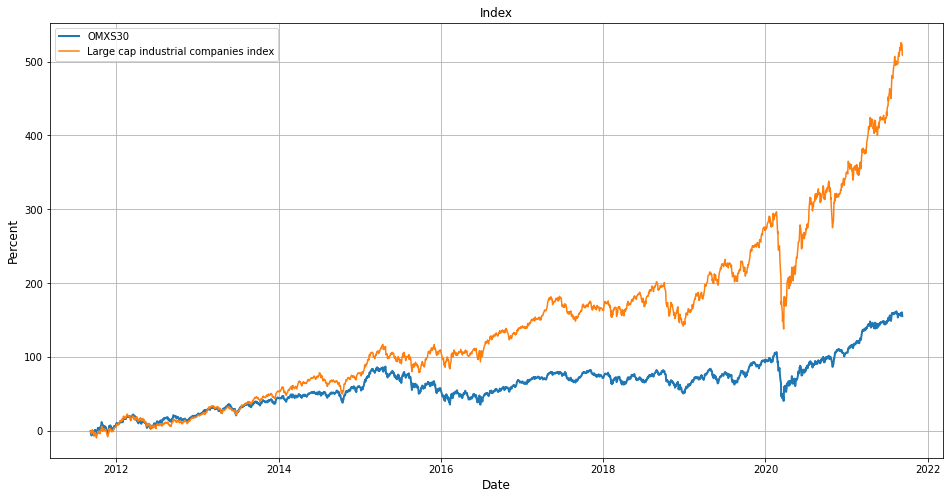

In [34]:
fig,ax = plt.subplots(figsize=(16, 8))
plt.plot(OMX_df['TradeDate'], OMX_df['percentage'], linewidth=2)

plt.plot(ABB_stock_df['TradeDate'], (VOLV_stock_df['percentage'] + ABB_stock_df['percentage'] + ADDT_stock_df['percentage'] + AFRY_stock_df['percentage'] + ALFA_stock_df['percentage']+ASSA_stock_df['percentage'] + ATCO_stock_df['percentage'] + BEIJ_stock_df['percentage'] + HEXA_stock_df['percentage'] + INDT_stock_df['percentage'] + JM_stock_df['percentage'] + LOOMIS_stock_df['percentage'] + NCC_stock_df['percentage'] + NIBE_stock_df['percentage'] + PEAB_stock_df['percentage'] + SAAB_stock_df['percentage'] + SAND_stock_df['percentage'] + SECU_stock_df['percentage'] + SKA_stock_df['percentage'] + SKF_stock_df['percentage'] + SWEC_stock_df['percentage'])/22)

plt.grid()
plt.title('Index')
plt.legend(['OMXS30', 'Large cap industrial companies index'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percent', fontsize=12)
plt.show()
